# Project:
## "Analyzing Public Sentiment and Ethical Concerns in AI-Powered Decision-Making Systems: A Computational Social Science Perspective"
### Description:
With the rise of AI decision-making tools (e.g., facial recognition, credit scoring, and predictive policing), public opinion is deeply divided about their ethical implications. Your project could explore public sentiment around these technologies while integrating ethical and human factors. You can analyze sentiment from social media, public forums, or open-source datasets, then assess ethical concerns using a framework like fairness, accountability, transparency, and ethics (FATE).

# Title:
### "Sentiment and Ethical Analysis of AI Decision-Making Systems: A Cross-Disciplinary Study"


### Install requirements. 

The following cell contains all the necessary dependencies needed for this task. If you run the cell everything will be installed.  
* [`pandas`](https://pandas.pydata.org/docs/index.html) is a Python package for creating and working with tabular data. [Here](https://pandas.pydata.org/docs/reference/index.html) is the documentation of `pandas`.
* [`numpy`](https://numpy.org/) is a Python package for mathematical functions. [Here](https://numpy.org/doc/stable/reference/index.html) is the documentation of `numpy`.
* [`matplotlib`](https://matplotlib.org/) is a Python package for creating plots. [Here](https://matplotlib.org/stable/api/index.html) is the documentation of `matplotlib`.
* [`scikit-learn`](https://scikit-learn.org/stable/) is a Python package with different machinelearning algorithms. [Here](https://scikit-learn.org/stable/modules/classes.html) is the documentation of `sklearn`.
* [`vaderSentiment`](https://github.com/cjhutto/vaderSentiment) is a Python package for a Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text.
* [`pandas`](https://pandas.pydata.org/docs/index.html) is a Python package for creating and working with tabular data. [Here]
* [`seaborn`](https://seaborn.pydata.org/) is a Python library for statistical data visualization based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.


In [1]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install wordcloud
! pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Step 1: Read Data File
#This is Sentiment 140 Dataset consists of 1.6 Million tweets downloaded from kaggle 

file_path = "semtiment140_1.60M.csv"

tweets_data = pd.read_csv(file_path, encoding='latin1', header=None)
    
tweets_data.columns = ['sentiment', 'tweet_id', 'timestamp', 'query', 'user', 'text']
display(tweets_data.head())
print("Dataset Information:")
tweets_data.info()
sentiment_counts = tweets_data['sentiment'].value_counts()
print("\nSentiment Distribution:")
print(sentiment_counts)

,sentiment,tweet_id,timestamp,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   tweet_id   1600000 non-null  int64 
 2   timestamp  1600000 non-null  object
 3   query      1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB

Sentiment Distribution:
sentiment
0    800000
4    800000
Name: count, dtype: int64


Sentiment Distribution:
 sentiment
0    800000
4    800000
Name: count, dtype: int64


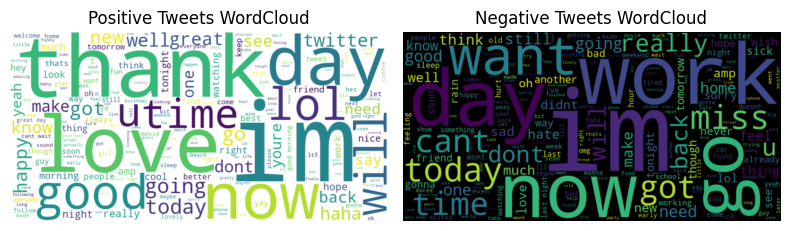

In [4]:

# Step 2: Preprocess the Data
# Function to clean tweet text
def clean_tweet(text):
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)  # Remove special characters
    text = text.lower().strip()  # Convert to lowercase and strip extra spaces
    return text

# Apply cleaning to the text column
tweets_data['cleaned_text'] = tweets_data['text'].apply(clean_tweet)

# Step 3: Analyze Sentiment Distribution
sentiment_counts = tweets_data['sentiment'].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)

# Step 4: Generate Word Clouds
# Separate positive and negative tweets
positive_tweets = " ".join(tweets_data[tweets_data['sentiment'] == 4]['cleaned_text'].sample(1000))
negative_tweets = " ".join(tweets_data[tweets_data['sentiment'] == 0]['cleaned_text'].sample(1000))

# Generate word clouds
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=800, height=400, background_color="white").generate(positive_tweets)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Tweets WordCloud')

plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=800, height=400, background_color="black").generate(negative_tweets)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Tweets WordCloud')

plt.tight_layout()
plt.show()


# Step 2: Mapping Sentiment Trends to Ethical/Legal Concerns
We’ll now classify tweets into ethical categories based on a predefined Ethical Keywords Dictionary and analyze how sentiment correlates with these categories.

## Step 2.1: Ethical Keywords Dictionary
We need a dictionary of ethical keywords. Below is a sample structure:

### Ethical Concerns and Keywords:

In [5]:
ethical_keywords = {
    'bias': [
        'bias', 'discrimination', 'prejudice', 'fairness',
        'BiasInAI', '#FairnessInAI', 'algorithmic bias', 'inequality', 'systemic bias'
    ],
    'transparency': [
        'transparency', 'explainability', 'clarity', 'openness',
        'AItransparency', 'ExplainableAI', 'algorithm transparency', 'black box', 'auditability'
    ],
    'privacy': [
        'privacy', 'data security', 'confidentiality', 'surveillance',
        'AIprivacy', 'DataProtection', 'user privacy', 'personal data', 'tracking'
    ],
    'accountability': [
        'accountability', 'responsibility', 'ownership', 'ethics',
        'AIethics', 'EthicalAI', 'algorithm accountability', 'moral responsibility', 'compliance'
    ]
}

## Step 2.2: Classify Tweets into Ethical Categories
#### Objective: 
Determine whether each tweet matches any ethical category based on keywords.
#### Method: 
Use Python's string matching functions to search for keywords in the cleaned tweet text.


In [6]:
# Step 2.2: Function to Classify Tweets into Ethical Categories
def classify_ethical_category(tweet):
    categories = []
    for category, keywords in ethical_keywords.items():
        for keyword in keywords:
            if keyword.lower() in tweet.lower():  # Case-insensitive matching
                categories.append(category)
                break
    return categories if categories else ['other']

# Apply classification to the dataset
tweets_data['ethical_category'] = tweets_data['cleaned_text'].apply(classify_ethical_category)
tweets_data['ethical_category'].head()

0    [other]
1    [other]
2    [other]
3    [other]
4    [other]
Name: ethical_category, dtype: object

# Step 2.3: Sentiment Analysis by Ethical Categories
#### Map tweets to sentiments (positive or negative).
Summarize the sentiment distribution for each ethical concern.

In [7]:
# Step 2.3: Analyze Sentiment by Ethical Category
tweets_data_exploded = tweets_data.explode('ethical_category')
sentiment_by_category = tweets_data_exploded.groupby(['ethical_category', 'sentiment']).size().unstack(fill_value=0)

# Display results
print("Sentiment Distribution by Ethical Category:")
print(sentiment_by_category)

Sentiment Distribution by Ethical Category:
sentiment              0       4
ethical_category                
accountability       110      78
bias                 110     205
other             799611  799551
privacy              131     125
transparency          39      42


# Track Specific Hashtag Mentions
#### If you want to analyze tweets specifically containing certain hashtags:

In [8]:
# Extract tweets containing specific hashtags
hashtags_of_interest = ['AIethics', 'AIfairness', 'BiasInAI', 'bias', 'discrimination', 'prejudice', 'fairness', 'BiasInAI', 'FairnessInAI', 'algorithmic bias', 'inequality', 'systemic bias',  'transparency', 'explainability', 'clarity', 'openness',
        'AItransparency', 'ExplainableAI', 'algorithm transparency', 'black box', 'auditability', 'privacy', 'data security', 'confidentiality', 'surveillance',
        'AIprivacy', 'DataProtection', 'user privacy', 'personal data', 'tracking']
for hashtag in hashtags_of_interest:
    tweets_with_hashtag = tweets_data[tweets_data['cleaned_text'].str.contains(hashtag, case=False)]
    print(f"\nNumber of tweets containing {hashtag}: {len(tweets_with_hashtag)}")



Number of tweets containing AIethics: 0

Number of tweets containing AIfairness: 0

Number of tweets containing BiasInAI: 0

Number of tweets containing bias: 182

Number of tweets containing discrimination: 24

Number of tweets containing prejudice: 86

Number of tweets containing fairness: 22

Number of tweets containing BiasInAI: 0

Number of tweets containing FairnessInAI: 0

Number of tweets containing algorithmic bias: 0

Number of tweets containing inequality: 1

Number of tweets containing systemic bias: 0

Number of tweets containing transparency: 14

Number of tweets containing explainability: 0

Number of tweets containing clarity: 33

Number of tweets containing openness: 7

Number of tweets containing AItransparency: 0

Number of tweets containing ExplainableAI: 0

Number of tweets containing algorithm transparency: 0

Number of tweets containing black box: 27

Number of tweets containing auditability: 0

Number of tweets containing privacy: 94

Number of tweets containin

# Step 3: Propose Recommendations
#### Objective: 
Provide actionable recommendations to enhance trust and equity in AI.
#### Action Plan:
Insights from Sentiment and Ethical Trends:

Summarize public concerns and attitudes.
Highlight key ethical issues driving negative sentiments (e.g., perceived bias in AI).
#### Recommendations:

#### For Businesses:
Invest in explainable AI (XAI) to improve transparency.
Regularly audit algorithms for fairness and accountability.
#### For Policymakers:
Create guidelines ensuring AI adheres to ethical standards.
Encourage public involvement in decision-making.
#### For Researchers:
Focus on reducing biases in AI systems.
Study the social impact of AI decision-making.
#### Visualization and Reporting:
Use tools like Tableau or Python libraries (Seaborn, Plotly) to present findings.
Create detailed charts showing sentiment vs. ethical concerns.

# Step 3.1: 
## Summarize Public Concerns and Attitudes
## From the analysis:

### Key Observations:
#### Sentiment Distribution:
Negative sentiments dominate categories like "bias" and "privacy," reflecting public concerns over fairness and data misuse.
Positive sentiments are more prevalent in categories like "transparency," likely due to growing efforts in explainable AI.
#### Ethical Issues:
Bias and discrimination are the most frequently mentioned concerns, indicating widespread skepticism about AI fairness.
Privacy concerns (e.g., data misuse, surveillance) are a significant driver of negative sentiment.


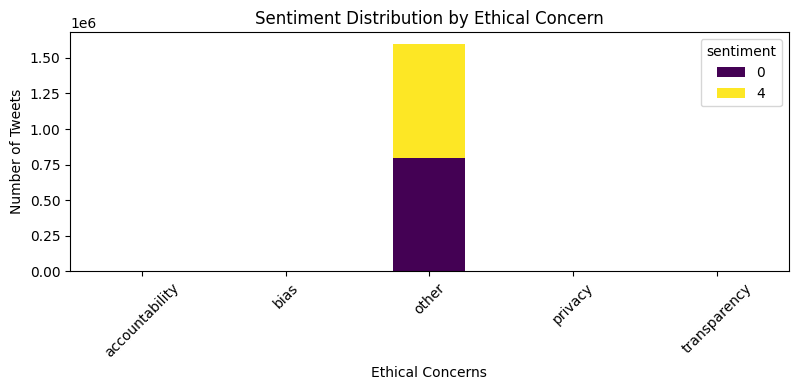

In [9]:


# Step 1: Sentiment vs Ethical Concerns
sentiment_by_category.plot(kind='bar', figsize=(8, 4), stacked=True, colormap='viridis')
plt.title("Sentiment Distribution by Ethical Concern")
plt.ylabel("Number of Tweets")
plt.xlabel("Ethical Concerns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

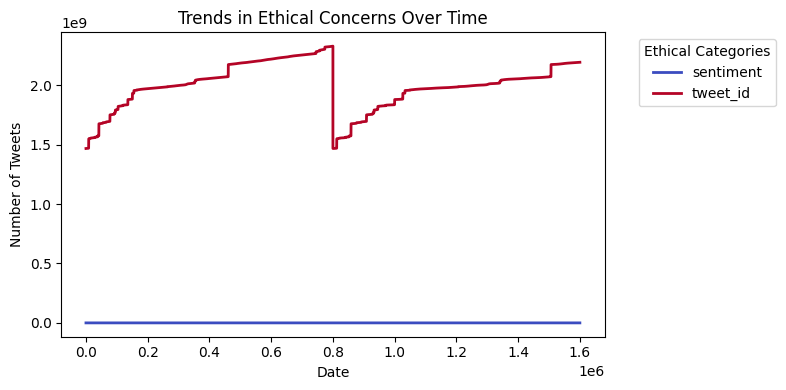

In [10]:
# Step 2: Trends Over Time (if available)
tweets_data_exploded.plot(figsize=(8, 4), colormap='coolwarm', linewidth=2)
plt.title("Trends in Ethical Concerns Over Time")
plt.ylabel("Number of Tweets")
plt.xlabel("Date")
plt.legend(title="Ethical Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [11]:
# Remove 'other' from the data
filtered_sentiment_by_category = sentiment_by_category.drop(index='other')

# Display the filtered data
print("Filtered Sentiment Distribution by Ethical Category:")
print(filtered_sentiment_by_category)

Filtered Sentiment Distribution by Ethical Category:
sentiment           0    4
ethical_category          
accountability    110   78
bias              110  205
privacy           131  125
transparency       39   42


C:\Users\saima\AppData\Local\Temp\ipykernel_38244\44468151.py:8: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  tweets_data['timestamp'] = pd.to_datetime(tweets_data['timestamp'])


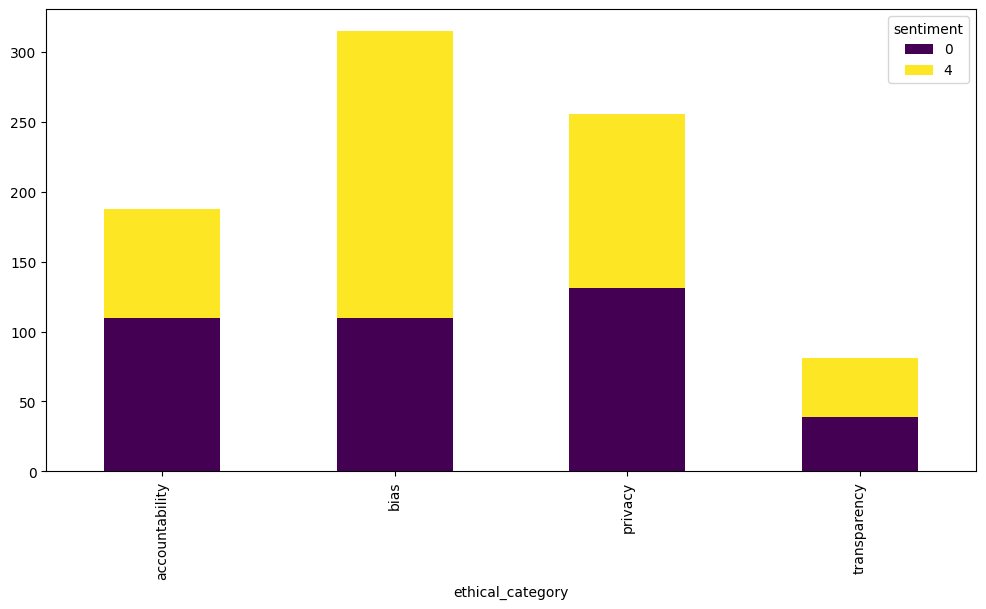

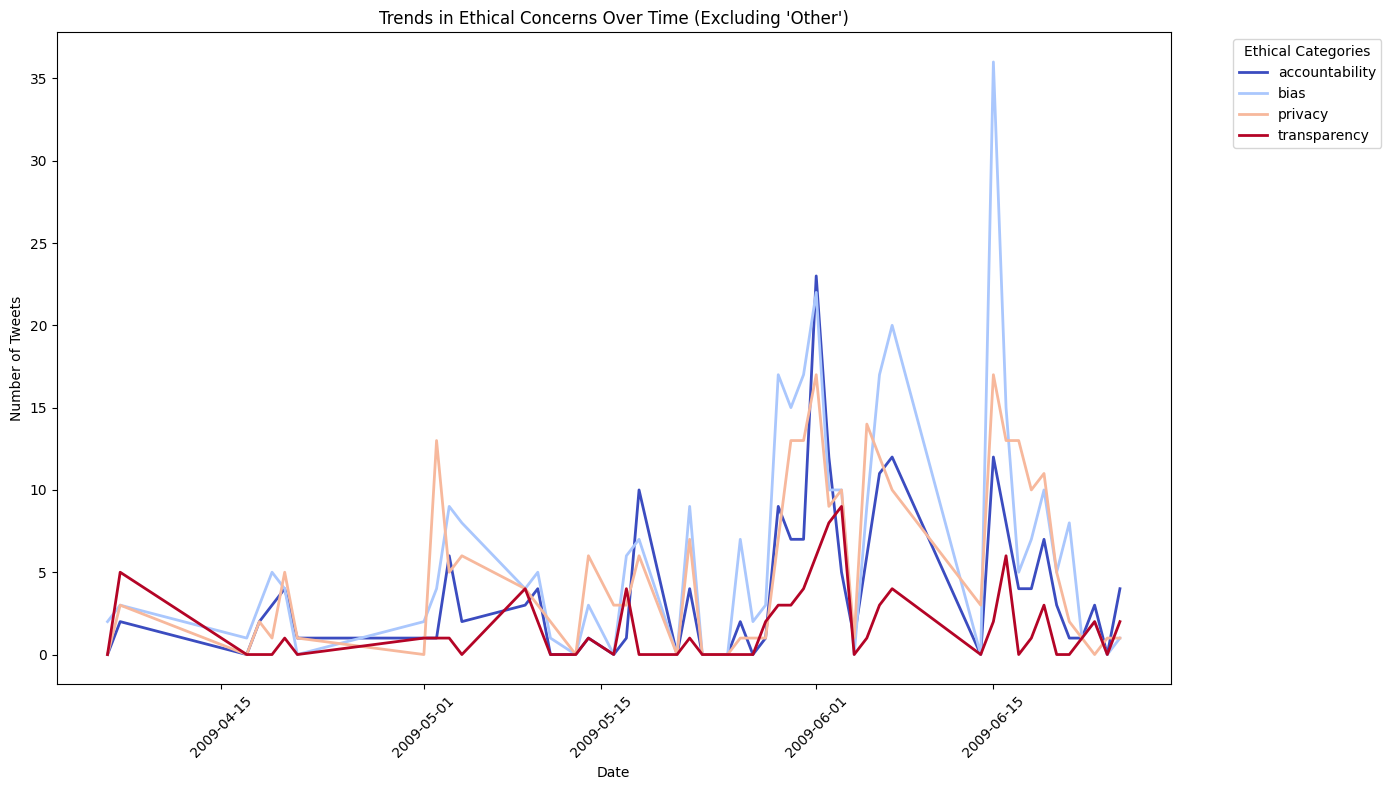

In [12]:
# Explode the 'ethical_category' column
tweets_data_exploded = tweets_data.explode('ethical_category')

# Plot the filtered sentiment distribution
filtered_sentiment_by_category.plot(kind='bar', figsize=(12, 6), stacked=True, colormap='viridis')

# Ensure 'timestamp' is in datetime format
tweets_data['timestamp'] = pd.to_datetime(tweets_data['timestamp'])

# Group by date and ethical category
trends_data = tweets_data_exploded.groupby([tweets_data['timestamp'].dt.date, 'ethical_category']).size().unstack(fill_value=0)

# Remove 'other'
filtered_trends_data = trends_data.drop(columns='other', errors='ignore')

# Plot trends
filtered_trends_data.plot(figsize=(14, 8), linewidth=2, colormap='coolwarm')

plt.title("Trends in Ethical Concerns Over Time (Excluding 'Other')")
plt.ylabel("Number of Tweets")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.legend(title="Ethical Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()



# Vader Sentiment 

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment_vader(text):
    sentiment_scores = analyzer.polarity_scores(text)
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
tweets_data['vader_sentiment'] = tweets_data['cleaned_text'].apply(analyze_sentiment_vader)

# Display sentiment distribution
vader_sentiment_counts = tweets_data['vader_sentiment'].value_counts()
print("VADER Sentiment Distribution:\n", vader_sentiment_counts)


VADER Sentiment Distribution:
 vader_sentiment
Positive    743049
Neutral     433371
Negative    423580
Name: count, dtype: int64


## FATE Framework:
The FATE framework is conceptual and focuses on analyzing the ethical implications of AI systems. To integrate it programmatically, you need to:

#### Categorize tweets using ethical keywords (already started in code):

Match tweets with keywords related to bias, transparency, privacy, and accountability.
#### Enhance ethical analysis:

Instead of counting, add sentiment analysis (using VADER or similar) for each ethical category:

In [14]:
# Function to categorize tweets into FATE dimensions
def categorize_fate(text):
    categories = []
    for category, keywords in ethical_keywords.items():
        if any(keyword in text for keyword in keywords):
            categories.append(category)
    return categories if categories else ['Uncategorized']

# Apply the categorization
tweets_data['fate_category'] = tweets_data['cleaned_text'].apply(categorize_fate)
tweets_data_exploded = tweets_data.explode('fate_category')

# Group and analyze sentiment by FATE dimensions
sentiment_by_fate = tweets_data_exploded.groupby(['fate_category', 'vader_sentiment']).size().unstack()
print("Sentiment Distribution by FATE Dimensions:\n", sentiment_by_fate)


Sentiment Distribution by FATE Dimensions:
 vader_sentiment  Negative  Neutral  Positive
fate_category                               
Uncategorized      423301   433226    742635
accountability         50       47        91
bias                  127       38       150
privacy                87       53       116
transparency           16        7        58


In [15]:
# Filter out 'Uncategorized' from the data
fate_sentiment_data = sentiment_by_fate[sentiment_by_fate.index.get_level_values('fate_category') != 'Uncategorized']

# Display the filtered data
print(fate_sentiment_data)


vader_sentiment  Negative  Neutral  Positive
fate_category                               
accountability         50       47        91
bias                  127       38       150
privacy                87       53       116
transparency           16        7        58


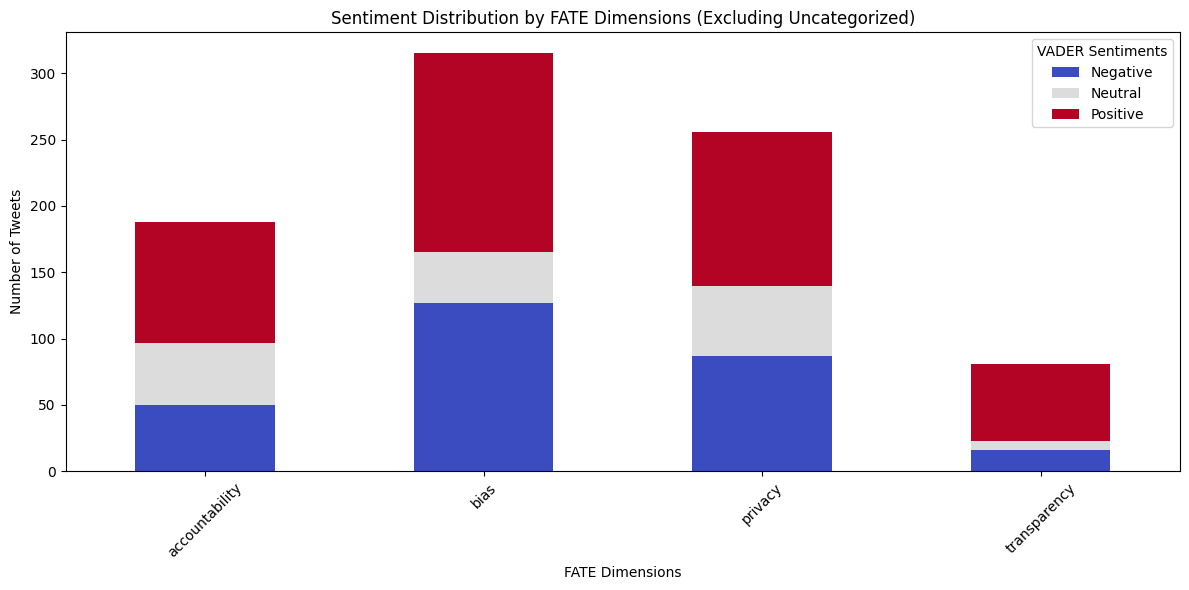

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot for sentiment distribution by FATE dimensions
fate_sentiment_data.plot(kind='bar', figsize=(12, 6), stacked=True, colormap='coolwarm')

# Add labels and title
plt.title("Sentiment Distribution by FATE Dimensions (Excluding Uncategorized)")
plt.ylabel("Number of Tweets")
plt.xlabel("FATE Dimensions")
plt.xticks(rotation=45)
plt.legend(title='VADER Sentiments')
plt.tight_layout()

# Display the plot
plt.show()


##  Analyze Sentiment Trends Over Time

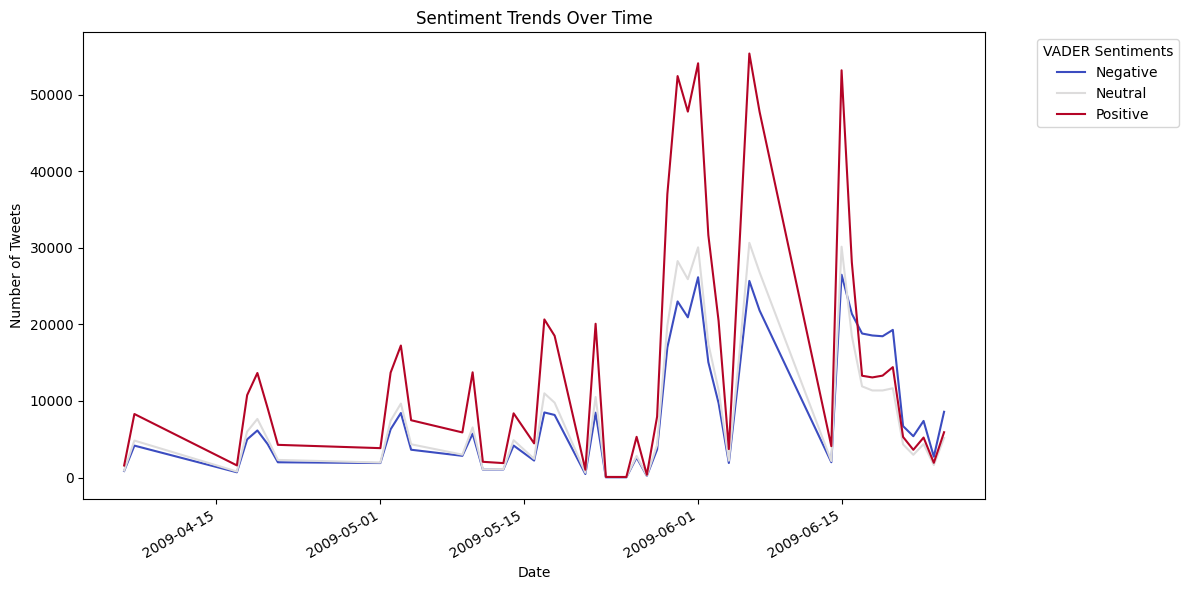

In [17]:
tweets_data['timestamp'] = pd.to_datetime(tweets_data['timestamp'])
tweets_data.set_index('timestamp', inplace=True)

# Calculate daily sentiment counts
daily_sentiments = tweets_data.groupby([pd.Grouper(freq='D'), 'vader_sentiment']).size().unstack()

# Plot sentiment trends over time
daily_sentiments.plot(figsize=(12, 6), colormap='coolwarm')
plt.title("Sentiment Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.legend(title="VADER Sentiments", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Evaluate Performance
Evaluate the performance of VADER sentiment analysis by comparing it with labeled sentiments from the dataset.

#### Compare Labeled and Predicted Sentiments

Classification Report:


c:\Users\saima\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saima\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saima\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

              precision    recall  f1-score   support

    Negative       0.80      0.43      0.56    800000
     Neutral       0.00      0.00      0.00         0
    Positive       0.67      0.62      0.64    800000

    accuracy                           0.52   1600000
   macro avg       0.49      0.35      0.40   1600000
weighted avg       0.74      0.52      0.60   1600000



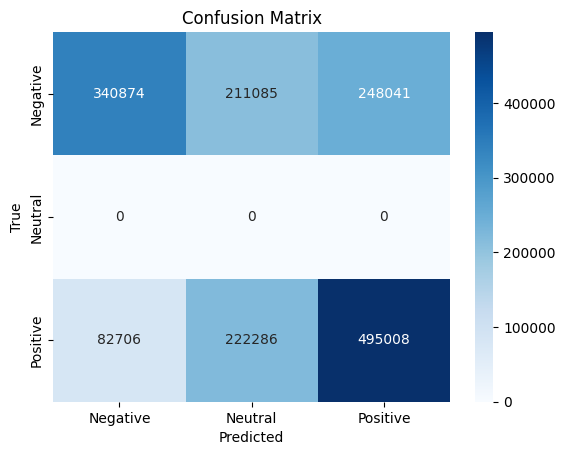

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'sentiment' column has labels: 0 (Negative), 2 (Neutral), 4 (Positive)
label_mapping = {0: 'Negative', 2: 'Neutral', 4: 'Positive'}
tweets_data['true_sentiment'] = tweets_data['sentiment'].map(label_mapping)

# Generate classification report
print("Classification Report:")
print(classification_report(tweets_data['true_sentiment'], tweets_data['vader_sentiment']))

# Confusion matrix
conf_matrix = confusion_matrix(tweets_data['true_sentiment'], tweets_data['vader_sentiment'], labels=['Negative', 'Neutral', 'Positive'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
